In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [2]:
def Get_Neighbors(df, distance_list, esp):
    Neighbors = []
    for nb in range(len(distance_list)):
        if distance_list[nb] <= esp:
            Neighbors.append(int(nb))
    return Neighbors

In [3]:
def Get_Clusters(data, distance, esp, minPoints, cluster):
    C = 0
    for x in range(len(cluster)):
        if not np.isnan(cluster[x]):
            continue
        N = Get_Neighbors(data,distance[x], esp)
        if len(N) < minPoints:
            cluster[x] = -1
            continue
        C = C + 1
        cluster[x] = C
        N.remove(x)
        S = list(N)
        for nb in S:
            if cluster[nb] == -1:
                cluster[nb] == C
            if not np.isnan(cluster[nb]):
                continue
            cluster[nb] = C
            N = Get_Neighbors(data, distance[nb], esp)
            if len(N) >= minPoints:
                S.extend(N)
    return list(cluster)

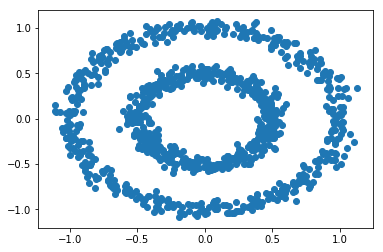

In [8]:
circle_data = np.genfromtxt('../data/circle.csv', delimiter=',')[1:,:]
circle_clusters = [np.nan for i in range(circle_data.shape[0])]
circle_distance = euclidean_distances(circle_data)
circle_esp = 0.2
circle_minPoints = 3
plt.scatter(circle_data[:,0], circle_data[:,1])
plt.show()

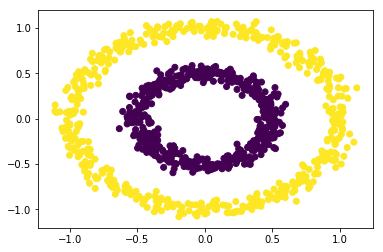

In [9]:
circle_pred = Get_Clusters(circle_data, circle_distance, circle_esp, circle_minPoints, circle_clusters)
plt.scatter(circle_data[:,0], circle_data[:,1], c=circle_pred)
plt.show()

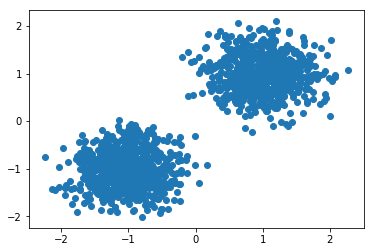

In [68]:
blob_data = np.genfromtxt('../data/blobs.csv', delimiter=',')[1:,:]
blob_clusters = [np.nan for i in range(blob_data.shape[0])]
blob_distance = euclidean_distances(blob_data)
blob_esp = 0.4
blob_minPoints = 3
plt.scatter(blob_data[:,0], blob_data[:,1])
plt.show()

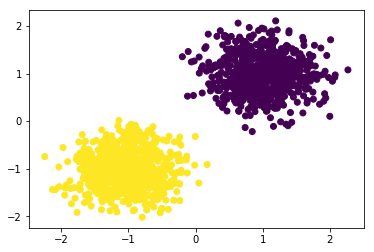

In [69]:
blob_pred = Get_Clusters(blob_data, blob_distance, blob_esp, blob_minPoints, blob_clusters)
plt.scatter(blob_data[:,0], blob_data[:,1], c=blob_pred)
plt.show()

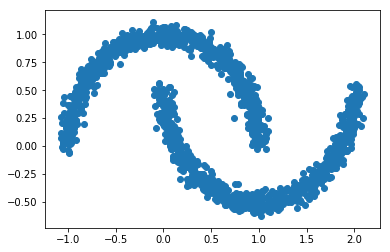

In [72]:
moon_data = np.genfromtxt('../data/moons.csv', delimiter=',')[1:,:]
moon_clusters = [np.nan for i in range(moon_data.shape[0])]
moon_distance = euclidean_distances(moon_data)
moon_esp = 0.2
moon_minPoints = 3
plt.scatter(moon_data[:,0], moon_data[:,1])
plt.show()

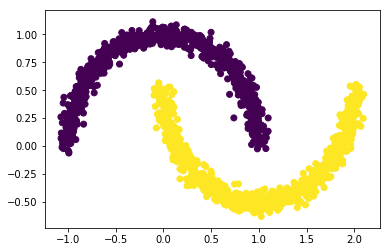

In [73]:
moon_pred = Get_Clusters(moon_data, moon_distance, moon_esp, moon_minPoints, moon_clusters)
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_pred)
plt.show()